In [6]:
import pandas as pd


file_path = r"C:\Users\sreea\Downloads\CloudWatch_Traffic_Web_Attack.csv" 
df = pd.read_csv(file_path)


print("Dataset Overview:")
df.info()


print("\nFirst Five Rows:")
print(df.head())


print("\nMissing Values:")
print(df.isnull().sum())


print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    ob

In [9]:
import pandas as pd
import numpy as np


file_path = r"C:\Users\sreea\Downloads\CloudWatch_Traffic_Web_Attack.csv"  
df = pd.read_csv(file_path)


print("Dataset Overview:")
df.info()




Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    ob

In [10]:
print("\nHandling Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Handling Missing Values:
bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64


In [19]:
print("\nHandling Outliers:")
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in df.select_dtypes(include=[np.number]).columns:
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), median_value, df[col])

print("Outliers have been handled successfully.")





Handling Outliers:
Outliers have been handled successfully.


In [21]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()
print("\nCleaned Dataset Overview:")
df.info()
    


Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bytes_in             240 non-null    float64
 1   bytes_out            240 non-null    float64
 2   creation_time        240 non-null    object 
 3   end_time             240 non-null    object 
 4   src_ip               240 non-null    object 
 5   src_ip_country_code  240 non-null    object 
 6   protocol             240 non-null    object 
 7   response.code        240 non-null    float64
 8   dst_port             240 non-null    float64
 9   dst_ip               240 non-null    object 
 10  rule_names           240 non-null    object 
 11  observation_name     240 non-null    object 
 12  source.meta          240 non-null    object 
 13  source.name          240 non-null    object 
 14  time                 240 non-null    object 
 15  detection_types   

In [23]:
print("\nExploratory Data Analysis:")
print("\nSummary Statistics:")
print(df[['bytes_in', 'bytes_out']].describe())


Exploratory Data Analysis:

Summary Statistics:
           bytes_in     bytes_out
count  2.820000e+02  2.820000e+02
mean   1.199390e+06  8.455429e+04
std    4.149312e+06  2.549279e+05
min    4.000000e+01  4.400000e+01
25%    5.381500e+03  1.114200e+04
50%    1.318200e+04  1.379950e+04
75%    3.083300e+04  2.627950e+04
max    2.520779e+07  1.561220e+06


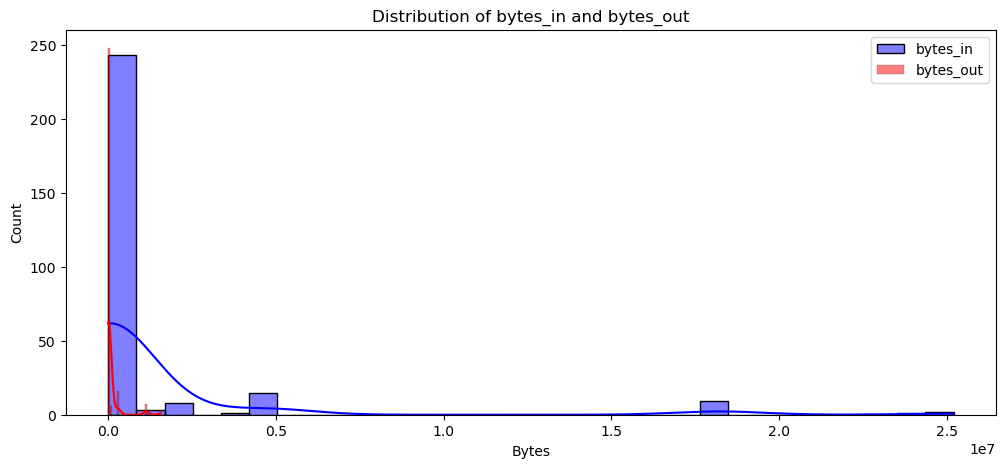

In [6]:
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


file_path = r"C:\Users\sreea\Downloads\CloudWatch_Traffic_Web_Attack.csv"
df = pd.read_csv(file_path)


df['bytes_in'] = df['bytes_in'].replace([float('inf'), float('-inf')], pd.NA)
df['bytes_out'] = df['bytes_out'].replace([float('inf'), float('-inf')], pd.NA)


plot_df = df[['bytes_in', 'bytes_out']].dropna()


plt.figure(figsize=(12, 5))
sns.histplot(plot_df['bytes_in'], bins=30, kde=True, color='blue', label='bytes_in')
sns.histplot(plot_df['bytes_out'], bins=30, kde=True, color='red', label='bytes_out')
plt.legend()
plt.title('Distribution of bytes_in and bytes_out')
plt.xlabel('Bytes')
plt.ylabel('Count')
plt.show()




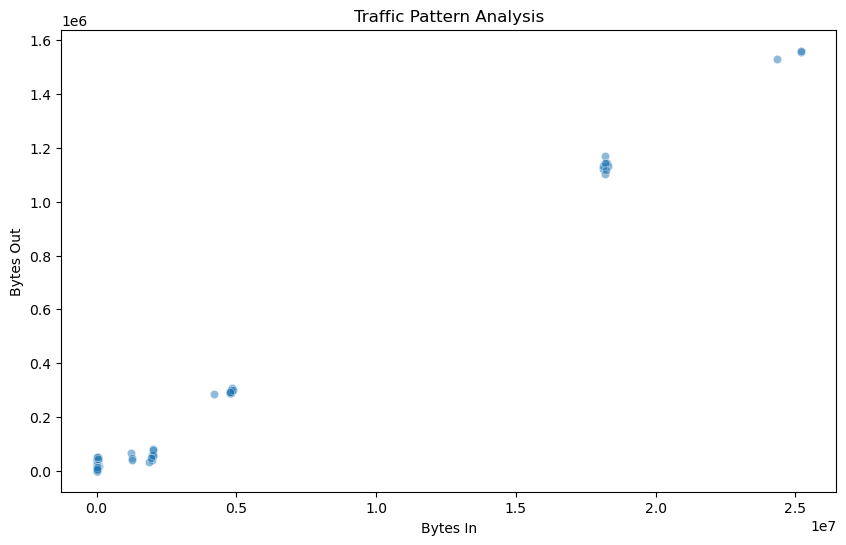

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], alpha=0.5)
plt.title('Traffic Pattern Analysis')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.show()

In [26]:
correlation = df[['bytes_in', 'bytes_out']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
           bytes_in  bytes_out
bytes_in   1.000000   0.997705
bytes_out  0.997705   1.000000


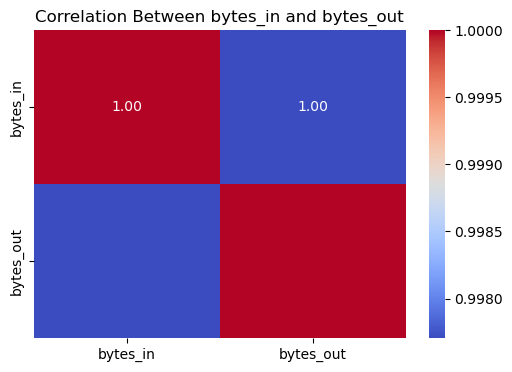

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between bytes_in and bytes_out')
plt.show()


In [30]:
print("\nFeature Engineering:")
if 'duration' in df.columns and 'bytes_in' in df.columns and 'bytes_out' in df.columns:
    df['traffic_rate'] = (df['bytes_in'] + df['bytes_out']) / df['duration']
    print("Traffic Rate feature added.")

if 'packets' in df.columns and 'bytes_in' in df.columns and 'bytes_out' in df.columns:
    df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['packets']
    print("Average Packet Size feature added.")

if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['month'] = df['timestamp'].dt.month
    print("Time-based features added: Hour, Day of Week, and Month.")

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

print("Categorical features encoded.")


Feature Engineering:
Categorical features encoded.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCountry-based Interaction Analysis:")
if 'country' in df.columns:
    country_counts = df['country'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
    plt.xlabel('Country')
    plt.ylabel('Interaction Count')
    plt.title('Top 10 Countries by Interaction Count')
    plt.xticks(rotation=45)
    plt.show()
    country_traffic = df.groupby('country')[['bytes_in', 'bytes_out']].sum().sort_values(by='bytes_in', ascending=False).head(10)
    country_traffic.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
    plt.xlabel('Country')
    plt.ylabel('Total Traffic (Bytes)')
    plt.title('Top 10 Countries by Traffic (Bytes In & Out)')
    plt.xticks(rotation=45)
    plt.legend(title='Traffic Type')
    plt.show()

    try:
        import geopandas as gpd
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        country_traffic_map = df.groupby('country')[['bytes_in', 'bytes_out']].sum().reset_index()
        world = world.merge(country_traffic_map, left_on='name', right_on='country', how='left')
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))
        world.plot(column='bytes_in', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
        plt.title('Country-Based Traffic Analysis (Bytes In)')
        plt.show()

    except ImportError:
        print("Geopandas not installed. Skipping world map visualization.")
else:
    print("No 'country' column found in dataset. Skipping country-based analysis.")



Country-based Interaction Analysis:
No 'country' column found in dataset. Skipping country-based analysis.



Anomaly Detection using Isolation Forest:
Anomaly Count:
 anomaly
Normal     267
Anomaly     15
Name: count, dtype: int64


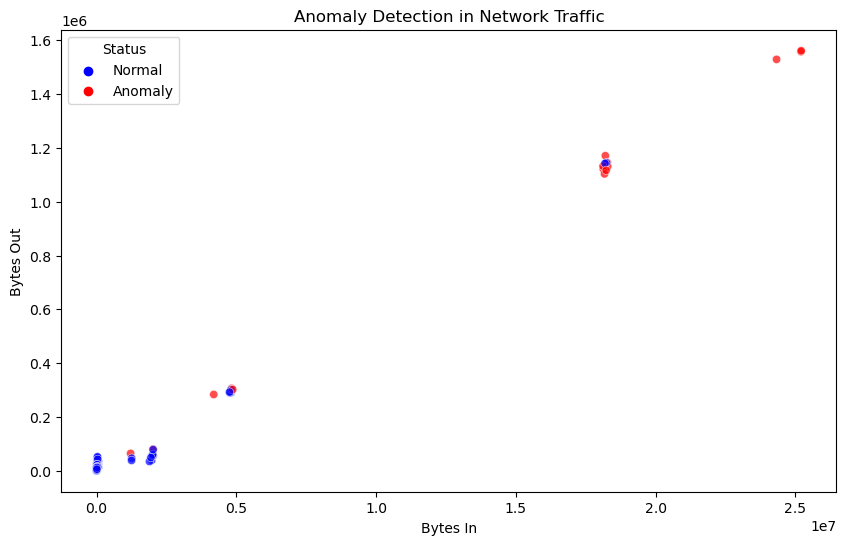

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



file_path = r"C:\Users\sreea\Downloads\CloudWatch_Traffic_Web_Attack.csv"  
df = pd.read_csv(file_path)

print("\nAnomaly Detection using Isolation Forest:")


features = ['bytes_in', 'bytes_out', 'traffic_rate', 'avg_packet_size']
available_features = [feature for feature in features if feature in df.columns]

if len(available_features) < 2:
    print("Not enough numerical features available for anomaly detection. Skipping this step.")
else:
    
    df_anomaly = df[available_features].copy()

    
    df_anomaly.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
    df_anomaly.dropna(inplace=True)

   
    df = df.loc[df_anomaly.index]

    
    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    df['anomaly_score'] = model.fit_predict(df_anomaly)

    
    df['anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

   
    anomaly_count = df['anomaly'].value_counts()
    print("Anomaly Count:\n", anomaly_count)

   
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly',
                    palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
    plt.xlabel('Bytes In')
    plt.ylabel('Bytes Out')
    plt.title('Anomaly Detection in Network Traffic')
    plt.legend(title="Status")
    plt.show()




Anomaly Detection using Isolation Forest:
Anomaly Count:
 anomaly
Normal     267
Anomaly     15
Name: count, dtype: int64


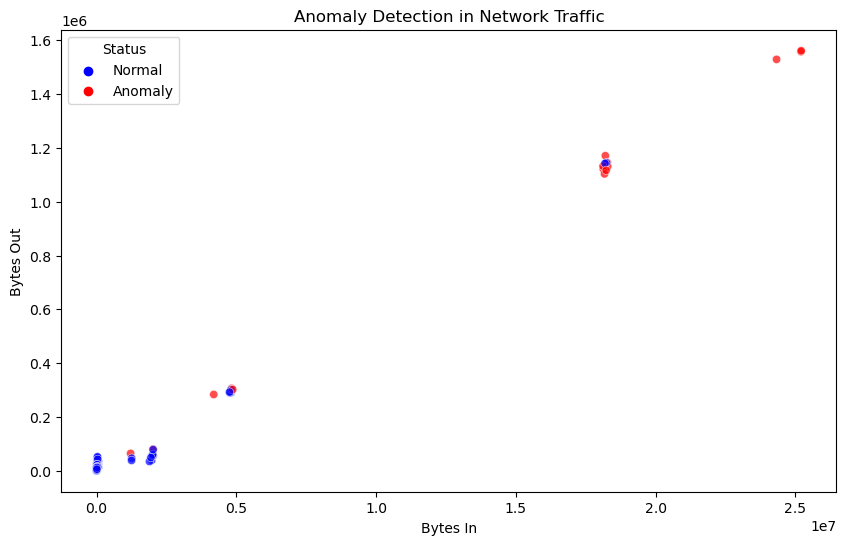

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


file_path = r"C:\Users\sreea\Downloads\CloudWatch_Traffic_Web_Attack.csv"  
df = pd.read_csv(file_path)
print("\nAnomaly Detection using Isolation Forest:")
features = ['bytes_in', 'bytes_out', 'traffic_rate', 'avg_packet_size']
available_features = [feature for feature in features if feature in df.columns]
if len(available_features) < 2:
    print("Not enough numerical features available for anomaly detection. Skipping this step.")
else:
    df_anomaly = df[available_features]

    
    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    df['anomaly_score'] = model.fit_predict(df_anomaly.values)  

    
    df['anomaly'] = df['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

   
    anomaly_count = df['anomaly'].value_counts()
    print("Anomaly Count:\n", anomaly_count)

    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], hue=df['anomaly'],
                    palette={'Normal': 'blue', 'Anomaly': 'red'}, alpha=0.7)
    plt.xlabel('Bytes In')
    plt.ylabel('Bytes Out')
    plt.title('Anomaly Detection in Network Traffic')
    plt.legend(title="Status")
    plt.show()


In [7]:
from sklearn.metrics import classification_report, confusion_matrix


if 'true_label' in df.columns:
    print("\nEvaluation of Anomaly Detection Model:")
    
    
    df['predicted_label'] = df['anomaly'].apply(lambda x: 1 if x == 'Anomaly' else 0)
    
    
    cm = confusion_matrix(df['true_label'], df['predicted_label'])
    print("Confusion Matrix:\n", cm)

    
    report = classification_report(df['true_label'], df['predicted_label'], target_names=['Normal', 'Anomaly'])
    print("\nClassification Report:\n", report)
    
else:
    print("No 'true_label' column found in the dataset. Evaluation is not possible.")


No 'true_label' column found in the dataset. Evaluation is not possible.


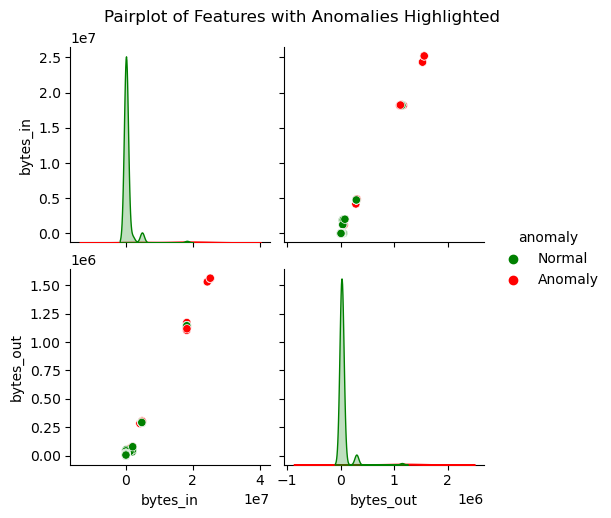

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df.dropna(inplace=True)
expected_columns = ['bytes_in', 'bytes_out', 'traffic_rate', 'avg_packet_size']
valid_columns = [col for col in expected_columns if col in df.columns]
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing and will be excluded: {missing_columns}")
if 'anomaly' not in df.columns:
    raise KeyError("'anomaly' column is missing from the DataFrame!")

sns.pairplot(df, hue='anomaly', vars=valid_columns,
             palette={'Normal': 'green', 'Anomaly': 'red'})

plt.suptitle("Pairplot of Features with Anomalies Highlighted", y=1.02)
plt.show()
